Read raw data with zone(from kmeans clustering result)
===

In [235]:
import time
import os
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from keras.utils import np_utils#
from numpy import genfromtxt
#from learning_model import *
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
%matplotlib inline

In [348]:
train_part_test = np.genfromtxt('./zone_result/set33_noleft_cluster.csv', delimiter=',')
pixel_pos = np.genfromtxt('./src/pixel_pos.csv', delimiter=',')
print (train_part_test)
#print (pixel_pos[1:,:])

[[  49.1785     23.5765     38.        -90.190456    3.      ]
 [  49.5745     20.4835     38.        -78.025792    9.      ]
 [  49.6675     14.7895     38.        -77.682243    9.      ]
 [  49.726      12.4165     38.        -89.866879    9.      ]
 [  49.7545     18.226      38.        -75.410881    9.      ]
 [  49.9465     16.4425     38.        -76.638889    9.      ]
 [  51.7885     23.629      38.        -86.154357    3.      ]
 [  52.102      12.5935     38.        -82.891244    9.      ]
 [  52.1275     18.2845     38.        -75.129018    9.      ]
 [  52.15       14.4895     38.        -80.948936    9.      ]
 [  52.1845     20.536      38.        -84.123554    3.      ]
 [  52.201      16.504      38.        -76.746606    9.      ]
 [  53.8405     20.3755     38.        -81.293162    9.      ]
 [  53.9785     16.459      38.        -83.513699    9.      ]
 [  54.1075     12.187      38.        -86.393529    9.      ]
 [  54.148      18.4705     38.        -76.775127    9.

PCI training
===

[41. 41. 41. 41. 41. 42. 41. 39. 38. 39. 41. 42. 41. 41. 41. 39. 41. 39.]
18
n_accuracy_pci== 18
len(pci_pred)== 18
pci accuracy:  1.0


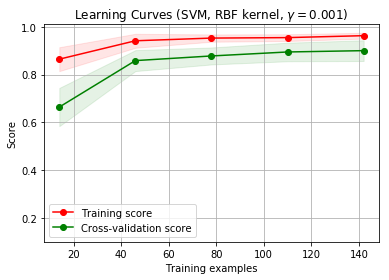

In [349]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
#y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print(X_train)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier(solver='adam', alpha=1e-5,
#                                hidden_layer_sizes=(100, 1), random_state=1)
#
'''
modelClassifier = Sequential()
modelClassifier.add(Dense(128, activation='relu', input_dim = 2))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(1,activation='relu'))
modelClassifier.compile(loss='mean_squared_error', optimizer='adam')
modelClassifier.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, shuffle=True)
'''
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
#print(y_test)
#print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )
plot_learning_curve(modelClassifier, title, X, y, ylim=(0.1, 1.01),cv=cv, n_jobs=4)
plt.show()

Predict pci and plot pci map
===

In [350]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

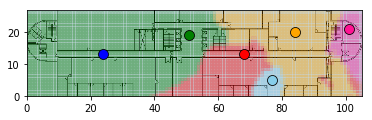

In [351]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [352]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
#print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
pci_result_zone_pd_nopci = np.delete(pci_result_zone_pd.values,[2],axis=1)
#print (pci_result_zone_pd)
#print (pci_result_zone_pd_nopci)
print (len(pci_result_zone_pd_nopci))
print (pci_result_zone_pd_nopci)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
#print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

2835
[[  0.   0.   0.]
 [  1.   0.   0.]
 [  2.   0.   0.]
 ...
 [102.  26.   0.]
 [103.  26.   0.]
 [104.  26.   0.]]


Merge raw data zone and use KNN to predict points zone without real data
===

In [353]:
#print(train_part_test)
#print(result)
#df_dul = np.delete(train_part_test,[2,3],axis=1)
df_dul_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df_dul_pd_train = pd.DataFrame(df_dul_pd,columns=['x','y','zone','pci','rsrp'])
print(len(df_dul_pd))
#print(df_dul_pd_train)
#df_dul_np = df_dul.values
df_dul_np = df_dul_pd_train.values
print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:len(df_dul_pd),0:2]
y = df_dul_np[:len(df_dul_pd),2]
#print(X)
#print(y)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier()
#modelClassifier = SVC(kernel='poly', probability=True)
#print(df_dul_np)
#pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[result:,0:2])
pci_pred = modelClassifier.fit(X, y).predict(pci_result_zone_pd_nopci[:,0:2])
print(len(pci_result_zone_pd_nopci))

print(pci_pred)
print(len(pci_pred))
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    #df_dul_np[result+i:,2] = pci_pred[i]
    pci_result_zone_pd_nopci[i,2] = pci_pred[i]
print (len(pci_pred))
print (len(pci_result_zone_pd_nopci))
print (pci_result_zone_pd_nopci)
df_dul_np = pci_result_zone_pd_nopci
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
#print (df_dul_np)
#np pci test
#df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','zone'])
print(type(df_dul_sort_pd))
#print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort_pd.csv')

#print (df_dul_sort)

178
[[  49.         24.          3.         38.        -90.190456]
 [  50.         20.          9.         38.        -78.025792]
 [  50.         15.          9.         38.        -77.682243]
 [  50.         12.          9.         38.        -89.866879]
 [  50.         18.          9.         38.        -75.410881]
 [  50.         16.          9.         38.        -76.638889]
 [  52.         24.          3.         38.        -86.154357]
 [  52.         13.          9.         38.        -82.891244]
 [  52.         18.          9.         38.        -75.129018]
 [  52.         14.          9.         38.        -80.948936]
 [  52.         21.          3.         38.        -84.123554]
 [  52.         17.          9.         38.        -76.746606]
 [  54.         20.          9.         38.        -81.293162]
 [  54.         16.          9.         38.        -83.513699]
 [  54.         12.          9.         38.        -86.393529]
 [  54.         18.          9.         38.        

In [354]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df = train_part_test_pd.append(pci_result_zone_pd)
print("len(df)==",len(df))
print(df)
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df = df[['x', 'y', 'pci', 'zone','rsrp']]
#print("df==",df)
np.savetxt('./result_rsrp/zone_beforemerge.csv', df, delimiter=',', fmt='%f')
df_no_rsrp = df.drop(['rsrp'],axis=1)
#no pci test
df_no_rsrp_nopci = df.drop(['pci'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp_nopci.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
#print(len(df_dul))
#print(df_dul)
#df_dul = df_dul[['x','y','pci','zone']]
df_dul = df_dul[['x','y','zone']]
np.savetxt('./result_rsrp/zone_aftermerge.csv', df_dul, delimiter=',', fmt='%f')
#df_dul_number = pd.DataFrame(df_dul,columns=['x','y','pci','zone'])
df_dul_number = pd.DataFrame(df_dul,columns=['x','y','zone'])
#print(df_dul_number)
number = 0
print(df_dul_number)
for a in range(len(df_dul_number)):
    if(df_dul_number.iloc[a,2] == 0):
        number = number+1
print(number)
result = (len(df_dul_number))-number
print(result)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


len(df)== 3013
       pci        rsrp      x     y  zone
0     38.0  -90.190456   49.0  24.0   3.0
1     38.0  -78.025792   50.0  20.0   9.0
2     38.0  -77.682243   50.0  15.0   9.0
3     38.0  -89.866879   50.0  12.0   9.0
4     38.0  -75.410881   50.0  18.0   9.0
5     38.0  -76.638889   50.0  16.0   9.0
6     38.0  -86.154357   52.0  24.0   3.0
7     38.0  -82.891244   52.0  13.0   9.0
8     38.0  -75.129018   52.0  18.0   9.0
9     38.0  -80.948936   52.0  14.0   9.0
10    38.0  -84.123554   52.0  21.0   3.0
11    38.0  -76.746606   52.0  17.0   9.0
12    38.0  -81.293162   54.0  20.0   9.0
13    38.0  -83.513699   54.0  16.0   9.0
14    38.0  -86.393529   54.0  12.0   9.0
15    38.0  -76.775127   54.0  18.0   9.0
16    38.0  -79.323158   54.0  15.0   9.0
17    38.0  -94.934746   55.0  23.0   3.0
18    39.0  -87.468382   56.0  12.0   1.0
19    38.0  -86.533766   56.0  21.0   3.0
20    39.0  -96.636585   57.0   9.0   4.0
21    39.0 -104.857143   57.0   3.0   4.0
22    39.0  -87.148

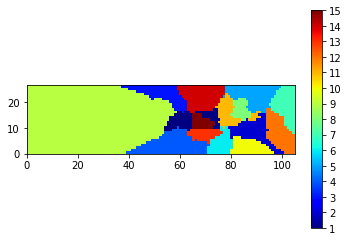

In [355]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
#no pci test
#data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
data_plot = (df_dul_sort.values[:,2]).reshape(27, 105)
#print(df_dul_sort)
img = plt.imread("./pic/51_5F-3.png")
#print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar(ticks=range(16))

Draw learning curve
===

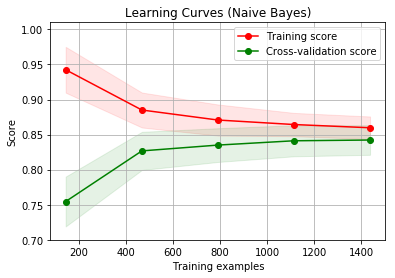

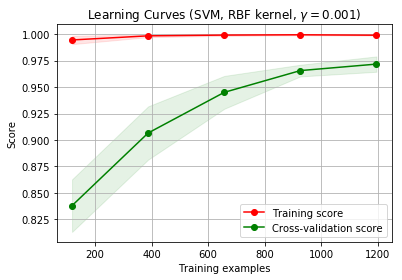

In [4]:
#def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
#print("X==",X[0:2])
#print("y==",y[:])
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y)

plt.show()


Get raw data rsrp and do rsrp training
===

In [57]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[  49.         24.         38.        -85.338039    4.      ]
 [  50.         15.         38.        -79.72        9.      ]
 [  50.         20.         38.        -79.552593   12.      ]
 [  50.         17.         38.        -75.01063    12.      ]
 [  50.         13.         38.        -80.438722    9.      ]
 [  50.         18.         38.        -65.92554    12.      ]
 [  52.         18.         38.        -69.382677   12.      ]
 [  52.         24.         38.        -87.356126    4.      ]
 [  52.         12.         38.        -80.14        9.      ]
 [  52.         15.         38.        -78.771429    9.      ]
 [  52.         21.         38.        -83.96378    12.      ]
 [  52.         17.         38.        -72.331452   12.      ]
 [  54.         12.         38.        -79.185827    9.      ]
 [  54.         20.         38.        -78.621912   12.      ]
 [  54.         18.         38.        -77.214607   12.      ]
 [  54.         17.         38.        -75.864173   12.

Delete mutiple training result list
===

In [356]:
rmse_list=[]
rmse_list_knn=[]
rmse_list_dt=[]
rmse_list_rf=[]
rmse_list_gb=[]
rmse_list_dnn=[]
choose_a = []
rmse_total = []

In [173]:
os.remove('./zone_result/zone_predict_total.csv')
print("zone_predict_total has been Removed!")

zone_predict_total has been Removed!


Start Rsrp training
===

In [113]:
print(train_part_test)

[[  49.         24.         38.        -89.866879    8.      ]
 [  50.         20.         38.        -75.410881    3.      ]
 [  50.         15.         38.        -77.682243    3.      ]
 [  50.         12.         38.        -89.866879    3.      ]
 [  50.         18.         38.        -75.410881    3.      ]
 [  50.         16.         38.        -76.638889    3.      ]
 [  52.         24.         38.        -86.154357    8.      ]
 [  52.         13.         38.        -82.891244    3.      ]
 [  52.         18.         38.        -75.129018    3.      ]
 [  52.         14.         38.        -80.948936    3.      ]
 [  52.         21.         38.        -84.123554    8.      ]
 [  52.         17.         38.        -76.746606    3.      ]
 [  54.         20.         38.        -81.293162    3.      ]
 [  54.         16.         38.        -83.513699    3.      ]
 [  54.         12.         38.        -86.393529    3.      ]
 [  54.         18.         38.        -76.775127    3.

In [114]:
print(df_dul_sort.values)

[[  0.   0.   3.]
 [  1.   0.   3.]
 [  2.   0.   3.]
 ...
 [102.  26.  10.]
 [103.  26.  10.]
 [104.  26.  10.]]


In [357]:
start = time.time()
for a in range(100):
    for i in range(1,16):
        print(i)
        zone = np.array([])
        zone = np.where(train_part_test[:,4] == i)
        #zone = np.where(X_sparse_total[:,7] == i)
        #print(train_part_test[zone[0],:])
        print("zone == ",zone[0])
        X = train_part_test[zone[0],0:3]
        y = train_part_test[zone[0],3]      
        #print(X)
        #print(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        #print(X_train)
        model_knn = KNeighborsRegressor(n_neighbors=3,weights='uniform')
        model_dt = DecisionTreeRegressor()
        model_rf = RandomForestRegressor()
        model_gb = GradientBoostingRegressor()
        model_dnn = MLPRegressor(solver='lbfgs', alpha=1e-5,
                                 hidden_layer_sizes=(100,), random_state=1) 
        #model = SVR(kernel='linear', C=1e3)
        #scores = cross_val_score(model, X, y, cv=5)
        #print("scores == ",scores)
        #print("scores.mean() == ",scores.mean())
        model_knn.fit(X_train, y_train)  
        model_dt.fit(X_train, y_train)
        model_rf.fit(X_train, y_train) 
        model_gb.fit(X_train, y_train) 
        model_dnn.fit(X_train, y_train) 
        #print(model)
        filename_knn = './model/finalized_model_' + str(i) +'-' +'knn'+'.sav'
        pickle.dump(model_knn, open(filename_knn, 'wb'))
        y_pred_knn = model_knn.predict(X_test)
        filename_dt = './model/finalized_model_' + str(i) +'-' +'dt'+'.sav'
        pickle.dump(model_dt, open(filename_dt, 'wb'))
        y_pred_dt = model_dt.predict(X_test)
        filename_rf = './model/finalized_model_' + str(i) +'-' +'rf'+'.sav'
        pickle.dump(model_rf, open(filename_rf, 'wb'))
        y_pred_rf = model_rf.predict(X_test)
        filename_gb = './model/finalized_model_' + str(i) +'-' +'gb'+'.sav'
        pickle.dump(model_gb, open(filename_gb, 'wb'))
        y_pred_gb = model_gb.predict(X_test)
        filename_dnn = './model/finalized_model_' + str(i) +'-' +'dnn'+'.sav'
        pickle.dump(model_dnn, open(filename_dnn, 'wb'))
        y_pred_dnn = model_dnn.predict(X_test)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #np pci test
        #zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
        #print(df_dul_sort)
        zone_allpoint = np.where(df_dul_sort.values[:,2] == i)
        #print (len(df_dul_sort.values))
        #print (df_dul_sort.values)
        #print (zone_allpoint)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
        #print(pci_result_zone)
        predict_zone_knn = model_knn.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_dt = model_dt.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_rf = model_rf.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_gb = model_gb.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_dnn = model_dnn.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        #print(len(predict_zone))
        #print("weight == ",len(predict_zone)/len(pci_result_rsrp_train))
        name_knn = './zone_result/zone_predict_' + str(i) +'knn'+'.csv'
        name_dt = './zone_result/zone_predict_' + str(i) +'dt'+'.csv'
        name_rf = './zone_result/zone_predict_' + str(i) +'rf'+'.csv'
        name_gb = './zone_result/zone_predict_' + str(i) +'gb'+'.csv'
        name_dnn = './zone_result/zone_predict_' + str(i) +'dnn'+'.csv'
        #df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
        df_loc = pd.DataFrame(pci_result_zone[zone_allpoint[0]+1,0:3],columns=['x','y','pci'])
        df_rsrp_knn = pd.DataFrame(predict_zone_knn,columns=['rsrp'])
        df_rsrp_dt = pd.DataFrame(predict_zone_dt,columns=['rsrp'])
        df_rsrp_rf = pd.DataFrame(predict_zone_rf,columns=['rsrp'])
        df_rsrp_gb = pd.DataFrame(predict_zone_gb,columns=['rsrp'])
        df_rsrp_dnn = pd.DataFrame(predict_zone_dnn,columns=['rsrp'])
        
        df_result_knn = pd.concat([df_loc,df_rsrp_knn],axis=1)
        df_result_dt = pd.concat([df_loc,df_rsrp_dt],axis=1)
        df_result_rf = pd.concat([df_loc,df_rsrp_rf],axis=1)
        df_result_gb = pd.concat([df_loc,df_rsrp_gb],axis=1)
        df_result_dnn = pd.concat([df_loc,df_rsrp_dnn],axis=1)

        df_result_knn.to_csv(name_knn,index=False,columns=['x','y','pci','rsrp'])
        df_result_dt.to_csv(name_dt,index=False,columns=['x','y','pci','rsrp'])
        df_result_rf.to_csv(name_rf,index=False,columns=['x','y','pci','rsrp'])
        df_result_gb.to_csv(name_gb,index=False,columns=['x','y','pci','rsrp'])
        df_result_dnn.to_csv(name_dnn,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    #print("[MSE]==",mean_squared_error(y_test, y_pred))
    #print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    #print("RMSE with weight result == ",(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5))
        print(mean_squared_error(y_test, y_pred_knn)**(0.5))
        print(len(predict_zone_knn))
        print(len(df_dul_sort.values))
        rmse_list_knn.extend((i,mean_squared_error(y_test, y_pred_knn)**(0.5),(len(predict_zone_knn)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_knn)**(0.5)))
        rmse_list_dt.extend((i,mean_squared_error(y_test, y_pred_dt)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_dt)**(0.5)))
        rmse_list_rf.extend((i,mean_squared_error(y_test, y_pred_rf)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_rf)**(0.5)))
        rmse_list_gb.extend((i,mean_squared_error(y_test, y_pred_gb)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_gb)**(0.5)))
        rmse_list_dnn.extend((i,mean_squared_error(y_test, y_pred_dnn)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_dnn)**(0.5)))
        #print("rmse_list == ",rmse_list)
        rmse_np_knn = np.array(rmse_list_knn)
        rmse_np_dt = np.array(rmse_list_dt)
        rmse_np_rf = np.array(rmse_list_rf)
        rmse_np_gb = np.array(rmse_list_gb)
        rmse_np_dnn = np.array(rmse_list_dnn)

        rmse_reshape_knn = np.reshape(rmse_np_knn,(int(len(rmse_np_knn)/3),3))
        rmse_reshape_dt = np.reshape(rmse_np_dt,(int(len(rmse_np_dt)/3),3))
        rmse_reshape_rf = np.reshape(rmse_np_rf,(int(len(rmse_np_rf)/3),3))
        rmse_reshape_gb = np.reshape(rmse_np_gb,(int(len(rmse_np_gb)/3),3))
        rmse_reshape_dnn = np.reshape(rmse_np_dnn,(int(len(rmse_np_dnn)/3),3))
        #print("rmse_np == ",rmse_np)
        #print("rmse_reshape == ",rmse_reshape_knn)
        #loaded_model_knn = pickle.load(open(filename_knn, 'rb')) 
        #loaded_model_dt = pickle.load(open(filename_dt, 'rb')) 
        #loaded_model_rf = pickle.load(open(filename_rf, 'rb')) 
        #loaded_model_gb = pickle.load(open(filename_gb, 'rb')) 
        #loaded_model_dnn = pickle.load(open(filename_dnn, 'rb')) 
rmse_reshape_knn = np.around(rmse_reshape_knn, decimals=2)
rmse_reshape_dt = np.around(rmse_reshape_dt, decimals=2)
rmse_reshape_rf = np.around(rmse_reshape_rf, decimals=2)
rmse_reshape_gb = np.around(rmse_reshape_gb, decimals=2)
rmse_reshape_dnn = np.around(rmse_reshape_dnn, decimals=2)
np.savetxt("./zone_result/rmse_reshape_knn.csv",rmse_reshape_knn, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_dt.csv",rmse_reshape_dt, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_rf.csv",rmse_reshape_rf, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_gb.csv",rmse_reshape_gb, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_dnn.csv",rmse_reshape_dnn, delimiter=',', fmt='%f')

rmse_reshape_pd_knn = pd.DataFrame(rmse_reshape_knn,columns=['zone','rmse_knn','weight_knn'])
rmse_reshape_pd_dt = pd.DataFrame(rmse_reshape_dt,columns=['zone','rmse_dt','weight_dt'])
rmse_reshape_pd_rf = pd.DataFrame(rmse_reshape_rf,columns=['zone','rmse_rf','weight_rf'])
rmse_reshape_pd_gb = pd.DataFrame(rmse_reshape_gb,columns=['zone','rmse_gb','weight_gb'])
rmse_reshape_pd_dnn = pd.DataFrame(rmse_reshape_dnn,columns=['zone','rmse_dnn','weight_dnn'])
#print("rmse_reshape_pd_knn == ",rmse_reshape_pd_knn)
rmse_reshape_pd_mean_knn = rmse_reshape_pd_knn.groupby('zone')['rmse_knn','weight_knn'].mean()
rmse_reshape_pd_mean_dt = rmse_reshape_pd_dt.groupby('zone')['rmse_dt','weight_dt'].mean()
rmse_reshape_pd_mean_rf = rmse_reshape_pd_rf.groupby('zone')['rmse_rf','weight_rf'].mean()
rmse_reshape_pd_mean_gb = rmse_reshape_pd_gb.groupby('zone')['rmse_gb','weight_gb'].mean()
rmse_reshape_pd_mean_dnn = rmse_reshape_pd_dnn.groupby('zone')['rmse_dnn','weight_dnn'].mean()

#print("result_knn == ",rmse_reshape_pd_mean_knn)
#print("rmse_reshape_pd_total_knn == ",rmse_reshape_pd_mean_dt['weight'].sum())
#print("result_dt == ",rmse_reshape_pd_mean_dt)
#print("rmse_reshape_pd_total_dt == ",rmse_reshape_pd_mean_dt['weight'].sum())
#print("result_rf == ",rmse_reshape_pd_mean_rf)
#print("result_gb == ",rmse_reshape_pd_mean_gb)
#print("result_dnn == ",rmse_reshape_pd_mean_dnn)

df_result_all = pd.concat([rmse_reshape_pd_mean_knn,rmse_reshape_pd_mean_dt,rmse_reshape_pd_mean_rf,rmse_reshape_pd_mean_gb,rmse_reshape_pd_mean_dnn],axis=1)
print("df_result_all == ",df_result_all)
df_result_noweight = df_result_all.drop(df_result_all.columns[[1, 3, 5, 7, 9]], axis=1)
print("df_result_noweight == ",df_result_noweight)

choose_a = df_result_noweight.values.argmin(axis=1)
#df_knn_all.drop(df_knn_all.index,inplace=True)
#df_dt_all.drop(df_dt_all.index,inplace=True)
#df_rf_all.drop(df_rf_all.index,inplace=True)
#df_gb_all.drop(df_gb_all.index,inplace=True)
#df_dnn_all.drop(df_dnn_all.index,inplace=True)

df_knn_all = pd.DataFrame(columns=['rmse', 'weight'])
df_dt_all = pd.DataFrame(columns=['rmse', 'weight'])
df_rf_all = pd.DataFrame(columns=['rmse', 'weight'])
df_gb_all = pd.DataFrame(columns=['rmse', 'weight'])
df_dnn_all = pd.DataFrame(columns=['rmse', 'weight'])
#df_knn_all = np.zeros(shape=(2835,2))
#df_dt_all = np.zeros(shape=(2835,2))
#df_rf_all = np.zeros(shape=(2835,2))
#df_gb_all = np.zeros(shape=(2835,2))
#df_dnn_all = np.zeros(shape=(2835,2))
print(choose_a)
for b in range(15):
    if choose_a[b] == 0:
        print("knn")
        df_knn = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'knn'+'.csv') 
        df_knn_all = df_knn_all.append(df_knn)
        rmse_total.append(df_result_all.iloc[b,1])
        print(df_result_all.iloc[b,0])
        #print(len(df_knn))
    if choose_a[b] == 1:
        print("dt")
        df_dt = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'dt'+'.csv') 
        df_dt_all = df_dt_all.append(df_dt)
        rmse_total.append(df_result_all.iloc[b,3])
        print(df_result_all.iloc[b,2])
        #print(df_result_all.iloc[b,3]*df_result_all.iloc[b,2])
        #print(df_dt)
        #print(len(df_dt))
    if choose_a[b] == 2:
        print("rf")
        df_rf = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'rf'+'.csv') 
        df_rf_all = df_rf_all.append(df_rf)
        rmse_total.append(df_result_all.iloc[b,5])
        print(df_result_all.iloc[b,4])
        #print(df_dt)
        #print(len(df_rf))
    if choose_a[b] == 3:
        print("gb")
        df_gb = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'gb'+'.csv') 
        df_gb_all = df_gb_all.append(df_gb)
        rmse_total.append(df_result_all.iloc[b,7])
        print(df_result_all.iloc[b,6])
        #print(df_dt)
        #print(len(df_gb))
    if choose_a[b] == 4:
        print("dnn")
        df_dnn = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'dnn'+'.csv') 
        df_dnn_all = df_dnn_all.append(df_dnn)
        rmse_total.append(df_result_all.iloc[b,9])
        print(df_result_all.iloc[b,8])
        #print(df_dt)
        #print(len(df_dnn))
#print(df_knn_all)
#print(df_dt_all)
df_result_algorithm = pd.concat([df_knn_all,df_dt_all,df_rf_all,df_gb_all,df_dnn_all],axis=0)

df_result_algorithm.to_csv('./zone_result/df_result_algorithm.csv')
df_result_algorithm = pd.DataFrame(df_result_algorithm,columns=['x','y','pci','rsrp'])
print("total==",len(df_result_algorithm))
print(sum(rmse_total))
#print(df_result_algorithm)
'''
for i in range(1,16):
    #zone_predict= np.genfromtxt('./zone_result/zone_predict_' + str(i) +'knn'+'.csv', delimiter=',')
    zone_predict_knn= np.genfromtxt('./zone_result/zone_predict_' + str(i) +'knn'+'.csv', delimiter=',')  
    #print(zone_predict[1:,:])
    with open('./zone_result/zone_predict_total_knn.csv','a') as f_handle:
        np.savetxt(f_handle,zone_predict_knn[1:,:], delimiter=',', fmt='%f')
    #df.to_csv('./zone_result/zone_predict_total.csv', mode='a', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])

zone_predict_total_np = np.genfromtxt('./zone_result/zone_predict_total.csv', delimiter=',')  
zone_predict_total_pd = pd.DataFrame(zone_predict_total_np,columns=['x','y','pci','rsrp'])
'''
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")


1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
3.2475212615807356
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
3.6212615814976212
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
2.0605840000000057
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.1878421084008972
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
3.5299827341488452
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
1.9116876006113592
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
3.342091999999994
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.121025000000003
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
1.9362670671179092
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
3.305825000000013
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
2.9112626347865036
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
2.7

3.1617127706616532
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
2.582043708972199
152
2835
15
zone ==  [45 50 54 59 65 74]
2.3144379999999956
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
1.652388652991653
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
4.398121671214666
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
5.1783636666666695
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.1101139386632473
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
1.659878095924894
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
0.5727183316439219
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
3.115686000000011
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
5.204782333333334
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
2.211999805429904
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
0.20185599999999226
83
2835


7.528835202554461
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
3.9109776666666676
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
2.7519584173919602
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
4.062581000000009
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
4.257917344982319
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
2.124672251334247
152
2835
15
zone ==  [45 50 54 59 65 74]
1.6288029999999907
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
4.929439179872986
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.6232989495714922
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
4.697108333333318
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.1101139386632473
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
1.265846236874882
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
2.

4.087026000000023
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.121025000000003
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
4.402738651087308
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
3.305825000000013
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
2.56455392944214
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
3.8651073333333414
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
4.632989289398905
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
5.063078053219071
152
2835
15
zone ==  [45 50 54 59 65 74]
0.15135999999999683
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
2.668769267505791
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.77347481365311
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
5.0840689999999995
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
0.6285137131531511
197
2835


5.0840689999999995
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
2.938439576565766
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
4.028848751977218
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
0.5741826109656987
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
3.6631409999999818
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
5.152525333333337
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
3.775345347190625
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
3.9109776666666676
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
0.6863180056763452
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
2.7844863333333336
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
4.056451212256879
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
5.271778657349738
152
2835
15
zone ==  [45 50 54 59 65 74]
0.56394066

5.071247477477775
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
3.5320754337457885
152
2835
15
zone ==  [45 50 54 59 65 74]
6.97462933333334
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
4.807801761396596
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
4.510183773680856
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
5.1783636666666695
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.9414794294456164
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
0.8142455073326349
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
5.021429106429889
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
2.8697236666666726
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
5.094467666666667
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
2.211999805429904
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
0.0971493333333342
83
2835
11

6.359397999999999
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
0.5256943624065259
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
8.676556333333338
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
3.145653941547766
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
3.037639901246522
152
2835
15
zone ==  [45 50 54 59 65 74]
0.15135999999999683
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
4.176441615864987
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.5470261784639305
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
6.856912666666659
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
3.6708551259886324
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
1.0186382459428915
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
3.7996209177497073
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 

0.6830799999999897
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
0.8358932353267062
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
1.4705569999999994
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
1.809954851490465
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
3.8651073333333414
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
2.53313213807563
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
3.0354233859877655
152
2835
15
zone ==  [45 50 54 59 65 74]
0.15135999999999683
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
2.7393280975327836
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.6805376196625326
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
4.697108333333318
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.6531244296894534
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
1

3.750398390645578
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
3.2187024035965677
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
0.7020610000000005
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.2394720000000063
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
3.866690095055469
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
0.20185599999999226
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
0.948457526587138
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
8.718143333333344
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
3.81013235126904
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
3.502206570503012
152
2835
15
zone ==  [45 50 54 59 65 74]
0.40069433333333393
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
2.0554244893745075
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.5411

0.40069433333333393
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
2.196528535704063
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.58057030828738
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
4.697108333333318
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.1101139386632473
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
4.045162499778725
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
0.5727183316439284
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
6.4185156666666785
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.2394720000000063
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
2.372944804506767
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
1.4705569999999994
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
2.7519584173919602
87
2835
12
zone ==  [160 161 162

1.1274010386853877
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
3.8651073333333414
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
4.5847296318392115
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
3.407623772451574
152
2835
15
zone ==  [45 50 54 59 65 74]
1.6288029999999907
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
7.129996468551813
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
2.530213160444905
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
2.0605840000000057
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
0.9026888312440415
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
0.8142455073326349
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
1.8974863398592525
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
3.342091999999994
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
0.6830799999999897
49
2835
9
zo

2.0899196513837723
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
1.176542000000012
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.7709376666666685
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
3.9579167623956577
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
6.359397999999999
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
1.7372244111576014
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
4.062581000000009
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
1.1681158021138183
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
5.545353199106469
152
2835
15
zone ==  [45 50 54 59 65 74]
2.3144379999999956
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
3.2286395520996827
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
6.093871687818752
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
5.1783636666666695
120


6.169458666666685
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
1.3456890512381294
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
4.118271583644214
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
0.49536559986033657
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
3.342091999999994
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
3.121025000000003
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
6.618123352380208
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
7.806001999999992
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
0.7232409461666673
87
2835
12
zone ==  [160 161 162 163 164 165 166 172]
8.676556333333338
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
2.200653270774701
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
4.084172962678558
152
2835
15
zone ==  [45 50 54 59 65 74]
1.6288029999

0.5639406666666673
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
5.206806473080669
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
3.7092256322654
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
5.1783636666666695
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
0.6285137131531511
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
5.394906204794994
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
3.315895146233372
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
2.241804666666667
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
1.3812203333333315
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
0.8358932353267062
1364
2835
10
zone ==  [107 110 113 114 120 127 135 145]
0.20185599999999226
83
2835
11
zone ==  [ 80  86  87  88  89  90  94  95  96  97  98 102 105 109 119 139 141 142
 153]
1.6426738158566188
87
2835
12
zone ==  [160 161 162 

8.718143333333344
129
2835
13
zone ==  [37 42 48 49 53 57 60 61 68 69 76 85]
2.8936120925349895
55
2835
14
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79 81]
1.2670297834845397
152
2835
15
zone ==  [45 50 54 59 65 74]
6.97462933333334
41
2835
1
zone ==  [18 22 27 32 36 41 63 64 70 73 78 82]
4.302797762449288
96
2835
2
zone ==  [106 111 112 121 123 128 131 132 134 143 144 146 150 152 154 155 159]
4.488593971361143
123
2835
3
zone ==  [ 0  6 10 17 19 25 26 30 34]
2.0605840000000057
120
2835
4
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 58]
2.519029874187999
197
2835
5
zone ==  [104 115 126 130 136 137 138 140 147 148 149 151 156 157 158]
4.028848751977218
150
2835
6
zone ==  [ 67  75  77  83  84  91  92  93  99 100 101]
3.680705114796385
74
2835
7
zone ==  [167 168 169 170 171 173 174 175 176 177]
2.241804666666667
115
2835
8
zone ==  [103 108 116 117 118 122 124 125 129 133]
5.094467666666667
49
2835
9
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
2.178527381412395
1364
2835


3.532199999999999
dnn
2.4015000000000004
knn
1.9596000000000016
total== 2835
1.2930999999999997
Time taken:  103.30519223213196 seconds.


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:222: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



Plot rsrp map
===

[[  0.           0.          38.         -88.471752  ]
 [  1.           0.          38.         -88.471752  ]
 [  2.           0.          38.         -88.471752  ]
 ...
 [102.          26.          42.         -52.5512064 ]
 [103.          26.          42.         -50.49092417]
 [104.          26.          42.         -48.43064194]]
[[  0.         0.        38.       -88.471752]
 [  1.         0.        38.       -88.471752]
 [  2.         0.        38.       -88.471752]
 ...
 [102.        26.        42.       -60.      ]
 [103.        26.        42.       -60.      ]
 [104.        26.        42.       -60.      ]]
2835


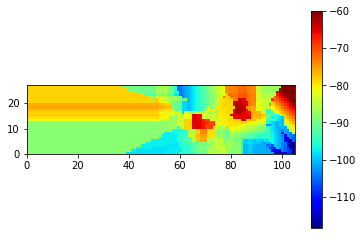

In [358]:
#df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
zone_predict_total_pd = df_result_algorithm
#print(df_total)
df_total_sort = zone_predict_total_pd.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
np.savetxt('./result_rsrp/rsrp_map_frompd.csv', rsrp_map_frompd, delimiter=',', fmt='%f')

for i in range(len(rsrp_map_frompd)):
    if rsrp_map_frompd[i,3]>=-60:
        rsrp_map_frompd[i,3] = -60
    if rsrp_map_frompd[i,3]<=-130:
        rsrp_map_frompd[i,3] = -130

print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()


Merge to 51-5F map
===

In [97]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((432, 288))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(640, 480)


In [ ]:
###choice K    
'''    for K in range(25):
        K_value = K+1
        model = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        print ("k==",K,"Accuracy is == ", accuracy)
'''
###choice K 

In [132]:
start = time.time()
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")

Time taken:  2.0503997802734375e-05 seconds.


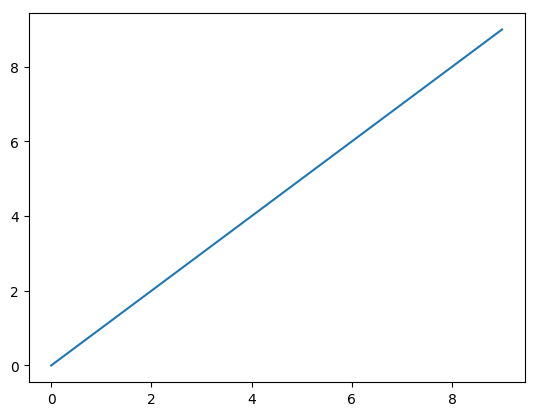

In [83]:

#plt.rcParams.update(plt.rcParamsDefault)
#inline_rc = dict(plt.rcParams)

#plt.plot(range(10))


In [104]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./pic/1.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
#bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((623, 411))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('raw.png')

(623, 411)
(614, 265)


Back code
===

In [ ]:
#title = "Learning Curves (KNN)"
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01))
    #plt.show()
    #train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train, "alpha",
    #                                              np.logspace(-7, 3, 3))
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #train_scores_mean = np.mean(train_scores, axis=1)
    #valid_scores_mean = np.mean(valid_scores, axis=1)
    #print("train_scores_mean==",train_scores_mean)
    #print("valid_scores_mean==",valid_scores_mean)
    #train_sizes, train_scores, valid_scores = learning_curve(model, X, y,train_sizes=np.linspace(.1, 1.0, 5), cv=5)
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01),cv=cv)
    #(a,b)=X.shape
    #print(a)
    #print(b)
    #plot_learning_curve(model, title, X, y)
    #plt.show()
    #scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    #print(scores)
    #print(scores.mean())
    '''
    if i==4:
        print("4")
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
    #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(30,), random_state=1) 
    #model = KNeighborsRegressor(n_neighbors=3)
        model.fit(X_train, y_train)
    elif i==3:
        print("3")
        model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                             hidden_layer_sizes=(30,), random_state=1) 
        model.fit(X_train, y_train)
    else:
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
        model.fit(X_train, y_train)
    '''

In [219]:
from sklearn.decomposition import DictionaryLearning
X = train_part_test[:,0:3]
y = train_part_test[:,3]
#print(X)
#print(y)
dct=DictionaryLearning(n_components=5)
dct.fit(X)
X_sparse = dct.transform(X)
print('components is:\n',dct.components_)
#print('after transform:\n',dct.transform(X))
print(type(X_sparse))
print(X_sparse)

components is:
 [[-0.86653434 -0.16985973 -0.46932494]
 [ 0.74830313  0.34251501  0.56808969]
 [-0.9089061  -0.20697463 -0.36200996]
 [-0.80365187 -0.02079332 -0.59473634]
 [ 0.9098468   0.03379493  0.41356585]]
<class 'numpy.ndarray'>
[[ -78.39979061    0.            0.            0.            0.        ]
 [ -94.22214839    0.            0.            0.            0.        ]
 [ -93.7125692     0.            0.            0.            0.        ]
 [ -79.79313983    0.            0.            0.            0.        ]
 [ -95.08868274    0.            0.            0.            0.        ]
 [ -94.56186785    0.            0.            0.            0.        ]
 [ -90.24643182    0.            0.            0.            0.        ]
 [   0.            0.         -111.63838346    0.            0.        ]
 [ -94.57910354    0.            0.            0.            0.        ]
 [ -76.66672192    0.            0.            0.            0.        ]
 [ -91.97950051    0.            0

In [220]:
#print(train_part_test)
train_part_test_del = np.delete(train_part_test, 0, axis=1)
train_part_test_del = np.delete(train_part_test_del, 0, axis=1)
#print(train_part_test_del)
X_sparse_total = np.concatenate((X_sparse,train_part_test_del), axis=1)
#print(X_sparse_total)
np.savetxt("./zone_result/X_sparse_total.csv",X_sparse_total, delimiter=',', fmt='%f')